# Computer vision & image processing with OpenCV

import required libraries:

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load Colored or white&black images:

colored image:

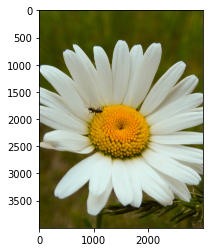

In [ ]:
img_path1 = "daisy2.jpg"
img1 = cv2.imread(img_path1, cv2.IMREAD_COLOR) #default is BGR

img1_RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) #convert to RGB

plt.imshow(img1_RGB) 

black & white image:

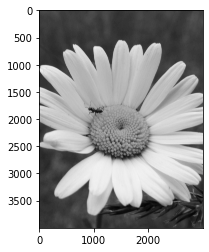

In [ ]:
img_gray = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

## Resize images:

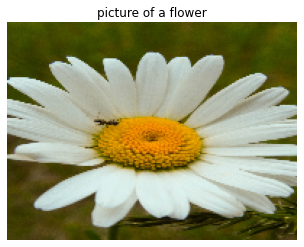

In [ ]:
height = 200
width = 150

resized_img = cv2.resize(img1, (height, width))
plt.title("picture of a flower");
plt.axis('off')
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.show()

## Image denoising/smoothing

In [ ]:
img_path2 = "cat2.jpg"
img2 = cv2.imread(img_path2, cv2.IMREAD_COLOR) #default is BGR
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) #convert to RGB


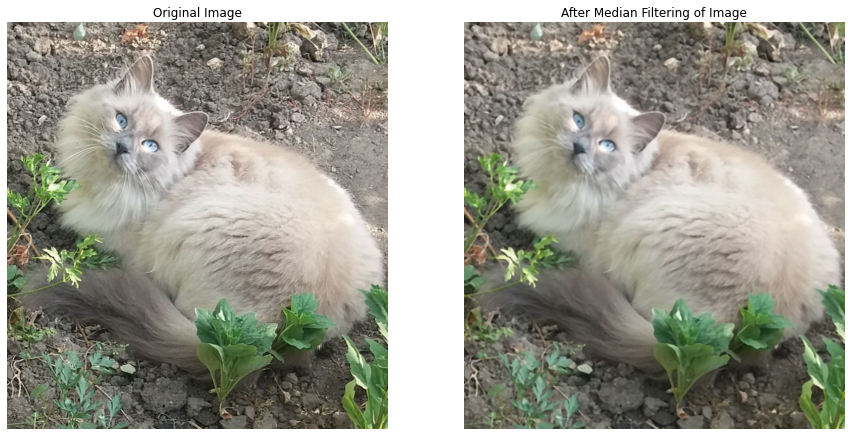

In [ ]:
denoised_img = cv2.medianBlur(img2, 5)
# denoised_img = cv2.medianBlur(denoised_img, 5)
# denoised_img = cv2.medianBlur(denoised_img, 5)
# denoised_img = cv2.medianBlur(denoised_img, 5)
# denoised_img = cv2.medianBlur(denoised_img, 5)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Original Image',);
plt.axis('off')

plt.imshow(img2)
plt.subplot(1, 2, 2).set_title(f'After Median Filtering of Image'); plt.axis('off')
plt.imshow(denoised_img)
plt.show()

## Image Thresholding
Image Thresholding means that if the pixel value in an image is above a certain threshold, a particular value is assigned and if it is below the threshold, another particular value is assigned.



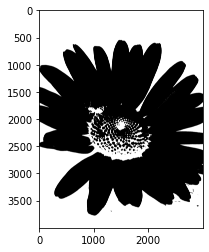

In [ ]:
# !! takes as input a grayscale image!!
(T, threshInv) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow( threshInv, cmap='gray')


another example:

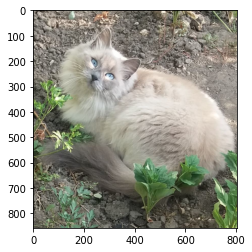

In [ ]:
img_path2 = "cat2.jpg"
img2 = cv2.imread(img_path2,  cv2.IMREAD_COLOR) #read as color
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) #convert to grayscale

plt.imshow(img2, cmap='gray')

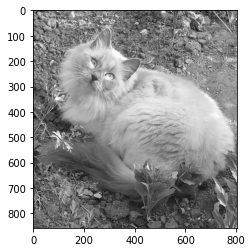

In [ ]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #convert to grayscale

plt.imshow(img2_gray, cmap='gray')

In [ ]:
# img = img2.img_to_array(img2, dtype='uint8')
# img2 = img2.astype("uint8")

th = cv2.adaptiveThreshold(img2_gray, maxValue = 255,
                           adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           thresholdType = cv2.THRESH_BINARY, 
                           blockSize = 11,
                           C = 3)

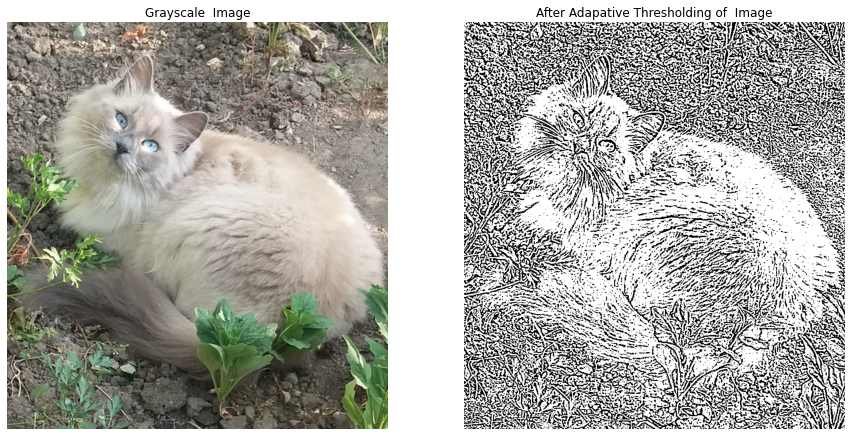

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title(f'Grayscale  Image'); plt.axis('off')
plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 2, 2).set_title(f'After Adapative Thresholding of  Image'); plt.axis('off')
plt.imshow(cv2.cvtColor(th, cv2.COLOR_BGR2RGB))
plt.show()

## Edge detection

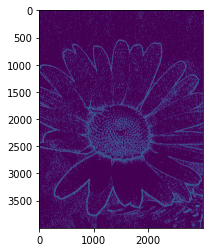

In [ ]:
edges = cv2.Canny(img1, threshold1 = 38, threshold2 = 40)
# plt.imshow(edges, cmap='gray')
plt.imshow(edges)

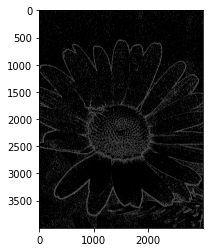

In [ ]:
plt.imshow(edges, cmap='gray')

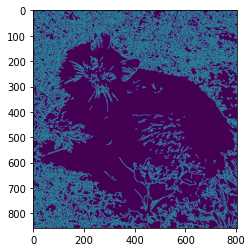

In [ ]:
edges = cv2.Canny(img2, threshold1 = 100, threshold2 = 200)
# plt.imshow(edges, cmap='gray')
plt.imshow(edges)

## Contours

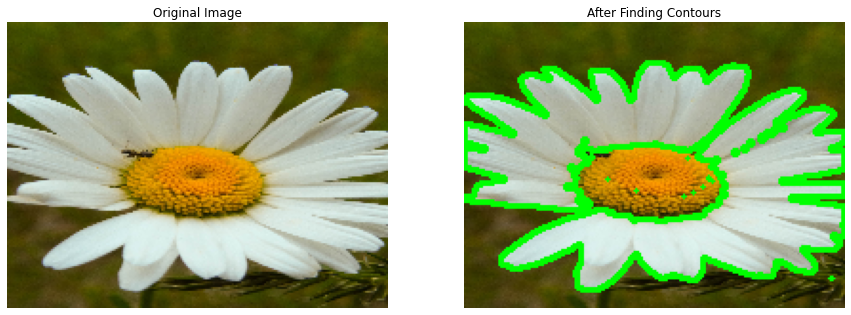

In [ ]:
plt.figure(figsize=(15, 8))

img = cv2.imread('daisy2.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to RGB

resized_img = cv2.resize(img, (height, width))
contours_img = resized_img.copy()

img_gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(img_gray, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, mode = cv2.RETR_TREE, method = cv2.CHAIN_APPROX_NONE)

cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0), thickness = 2)
plt.subplot(1,2,1).set_title('Original Image'); plt.axis('off')   
plt.imshow(resized_img)
plt.subplot(1,2,2).set_title('After Finding Contours'); plt.axis('off')   
plt.imshow(contours_img)
plt.show()

## Face and eye detection

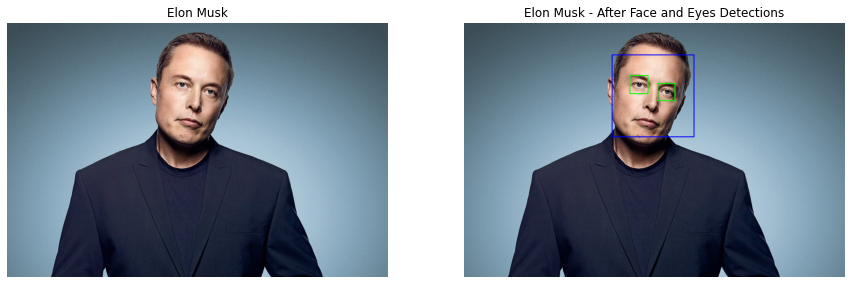

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('test_face.jpg')

# img = cv2.resize(img, (height, width))
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
for (fx, fy, fw, fh) in faces:
  img = cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), (255, 0, 0), 2)
  roi_gray = gray[fy:fy+fh, fx:fx+fw]
  roi_color = img[fy:fy+fh, fx:fx+fw]
  eyes = eye_cascade.detectMultiScale(roi_gray)

  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1).set_title('Elon Musk'); plt.axis('off')   
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2).set_title('Elon Musk - After Face and Eyes Detections'); plt.axis('off')   
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

More resources & bibliography:

*   https://www.analyticsvidhya.com/blog/2021/05/computer-vision-using-opencv-with-practical-examples/

